🔹 Primeiras linhas do dataset:


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0



🔹 Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg) 

## 📊 **Análise da Distribuição de Doenças Cardíacas**

➡️ Esse gráfico mostra a quantidade de pessoas que têm ou não doenças cardíacas.

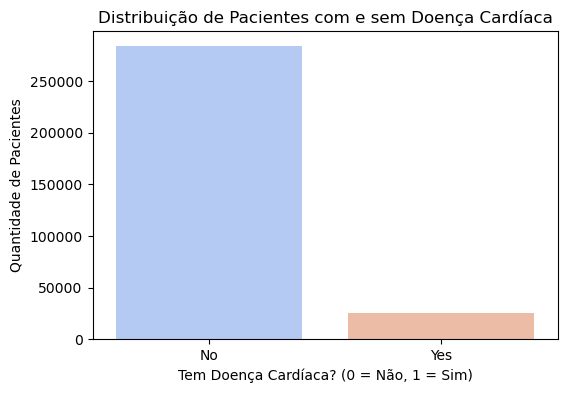

In [49]:
# 🔹 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1️⃣ Carregar os dados
df = pd.read_csv("Cardiovascular-Diseases-Risk.csv")

# 2️⃣ Explorar os dados
print("🔹 Primeiras linhas do dataset:")
display(df.head())
print("\n🔹 Informações sobre o dataset:")
print(df.info())
print("\n🔹 Valores nulos por coluna:")
print(df.isnull().sum())



# 📌 **1️⃣ Distribuição da Doença Cardíaca**
display(Markdown("## 📊 **Análise da Distribuição de Doenças Cardíacas**"))
display(Markdown("➡️ Esse gráfico mostra a quantidade de pessoas que têm ou não doenças cardíacas."))

plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Disease', hue='Heart_Disease', data=df, palette='coolwarm', legend=False)  # Ajustado para remover o aviso
plt.title("Distribuição de Pacientes com e sem Doença Cardíaca")
plt.xlabel("Tem Doença Cardíaca? (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade de Pacientes")
plt.show()

In [50]:
# 3️⃣ Tratamento e Preparação dos Dados
df.dropna(inplace=True)  # Remover valores nulos

# Converter variáveis categóricas para numéricas
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos para reverter se necessário





🎯 Acurácia do Modelo Random Forest: 0.7269

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     56774
           1       0.20      0.79      0.32      4997

    accuracy                           0.73     61771
   macro avg       0.59      0.76      0.57     61771
weighted avg       0.91      0.73      0.79     61771

🎯 Acurácia no Treino: 0.7307


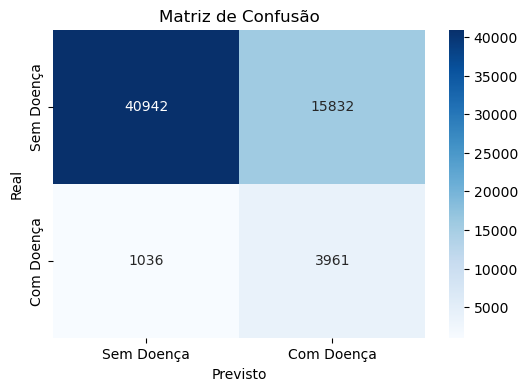


🔍 Validação Cruzada (5-fold):
Acurácia Média: 0.7267
Desvio Padrão: 0.0066
➡️ Um desvio padrão baixo indica que o modelo generaliza bem.


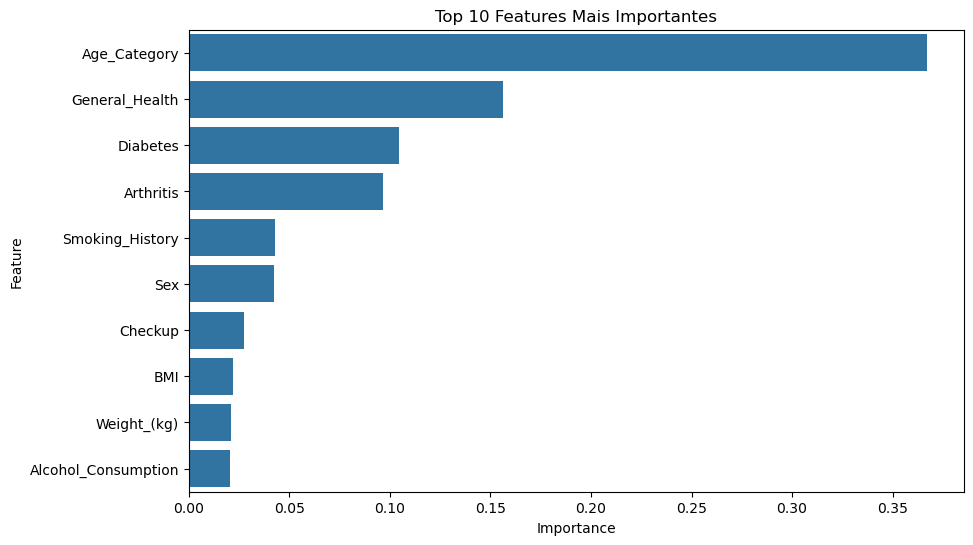


🔎 **Insight sobre Features:**
As variáveis mais importantes são: ['Age_Category', 'General_Health', 'Diabetes']
➡️ Considere remover features com baixa importância para simplificar o modelo.


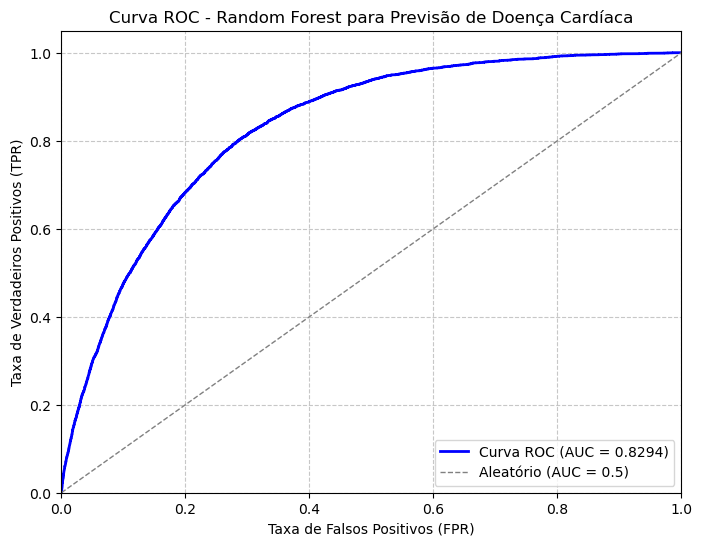

📈 ROC AUC: 0.8294
➡️ Um valor próximo de 1 indica excelente discriminação entre as classes.


In [51]:
# Separar variáveis preditoras (X) e variável alvo (y)
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4️⃣ Treinar o Modelo Random Forest com ajustes para evitar overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,           # Número de árvores
    max_depth=10,               # Limita a profundidade das árvores
    min_samples_split=10,       # Mínimo de amostras para dividir um nó
    min_samples_leaf=5,         # Mínimo de amostras por folha
    max_features='sqrt',        # Usa a raiz quadrada do número de features por split
    class_weight='balanced',    # Balanceia as classes automaticamente
    random_state=42
)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliação do Modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Acurácia do Modelo Random Forest: {accuracy:.4f}")

# Relatório de Classificação
print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred))


y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"🎯 Acurácia no Treino: {train_accuracy:.4f}")

# Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Sem Doença", "Com Doença"], yticklabels=["Sem Doença", "Com Doença"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Validação Cruzada para verificar generalização
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='accuracy')
print("\n🔍 Validação Cruzada (5-fold):")
print(f"Acurácia Média: {cv_scores.mean():.4f}")
print(f"Desvio Padrão: {cv_scores.std():.4f}")
print("➡️ Um desvio padrão baixo indica que o modelo generaliza bem.")

# Importância das Features
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Gráfico de Importância das Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Features Mais Importantes")
plt.show()

print("\n🔎 **Insight sobre Features:**")
print("As variáveis mais importantes são:", feature_importance_df['Feature'].head(3).tolist())
print("➡️ Considere remover features com baixa importância para simplificar o modelo.")


y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva (1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Taxa de Falsos Positivos (FPR) e Verdadeiros Positivos (TPR)
roc_auc = roc_auc_score(y_test, y_pred_prob)  # Cálculo do AUC

# Gráfico da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Aleatório (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Random Forest para Previsão de Doença Cardíaca')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"📈 ROC AUC: {roc_auc:.4f}")
print("➡️ Um valor próximo de 1 indica excelente discriminação entre as classes.")


## 📊 **Distribuição da Idade por Doença Cardíaca**

➡️ Aqui analisamos se a idade influencia na presença de doenças cardíacas.

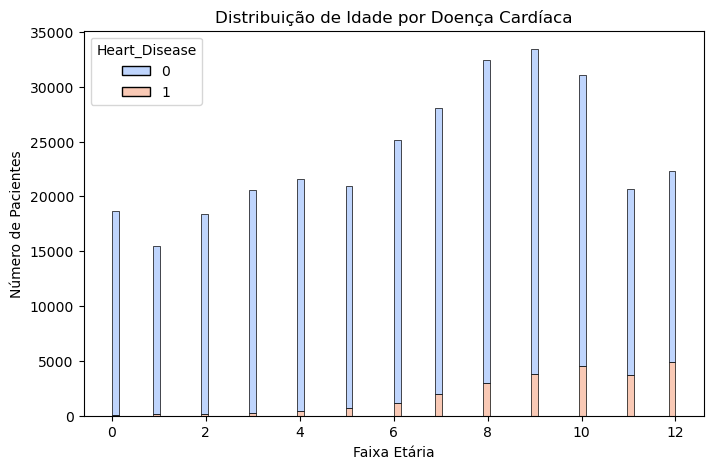

### 🔎 **Insight:**

Se a maior parte dos pacientes com doença cardíaca estiver em faixas etárias mais altas, campanhas de prevenção podem ser direcionadas a esse grupo.


## 📊 **Consumo de Batatas Fritas e Doenças Cardíacas**

➡️ O consumo excessivo de frituras pode estar associado ao aumento do risco de doenças cardíacas.

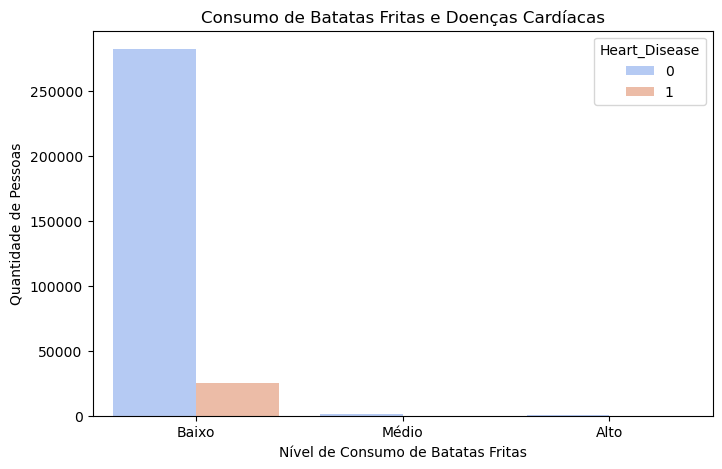

### 🔎 **Insight:**

Se houver uma relação entre alto consumo de frituras e doenças cardíacas, mudanças na dieta podem ser recomendadas.


## 📊 **Consumo de Vegetais e Doenças Cardíacas**

➡️ Pessoas que consomem mais vegetais podem ter menor risco de desenvolver doenças cardíacas.

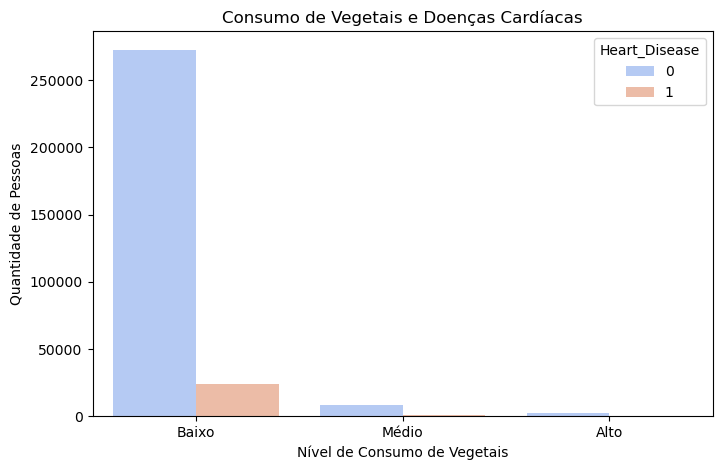

### 🔎 **Insight:**

Se o maior consumo de vegetais estiver associado a menor incidência de doenças cardíacas, isso reforça a importância de uma alimentação saudável.

In [52]:


# 📌 **2️⃣ Analisando a Idade e a Doença Cardíaca**
display(Markdown("\n## 📊 **Distribuição da Idade por Doença Cardíaca**"))
display(Markdown("➡️ Aqui analisamos se a idade influencia na presença de doenças cardíacas."))

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age_Category', hue='Heart_Disease', multiple="stack", palette='coolwarm', kde=False)
plt.title("Distribuição de Idade por Doença Cardíaca")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Pacientes")
plt.show()

display(Markdown("### 🔎 **Insight:**"))
display(Markdown("Se a maior parte dos pacientes com doença cardíaca estiver em faixas etárias mais altas, campanhas de prevenção podem ser direcionadas a esse grupo."))





# 📌 **3️⃣ Relação entre Consumo de Alimentos e Doenças Cardíacas**
df['FriedPotato_Consumption_Binned'] = pd.cut(df['FriedPotato_Consumption'], bins=3, labels=["Baixo", "Médio", "Alto"])
df['Green_Vegetables_Consumption_Binned'] = pd.cut(df['Green_Vegetables_Consumption'], bins=3, labels=["Baixo", "Médio", "Alto"])

display(Markdown("\n## 📊 **Consumo de Batatas Fritas e Doenças Cardíacas**"))
display(Markdown("➡️ O consumo excessivo de frituras pode estar associado ao aumento do risco de doenças cardíacas."))

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='FriedPotato_Consumption_Binned', hue='Heart_Disease', palette='coolwarm')
plt.title("Consumo de Batatas Fritas e Doenças Cardíacas")
plt.xlabel("Nível de Consumo de Batatas Fritas")
plt.ylabel("Quantidade de Pessoas")
plt.show()

display(Markdown("### 🔎 **Insight:**"))
display(Markdown("Se houver uma relação entre alto consumo de frituras e doenças cardíacas, mudanças na dieta podem ser recomendadas."))

display(Markdown("\n## 📊 **Consumo de Vegetais e Doenças Cardíacas**"))
display(Markdown("➡️ Pessoas que consomem mais vegetais podem ter menor risco de desenvolver doenças cardíacas."))

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Green_Vegetables_Consumption_Binned', hue='Heart_Disease', palette='coolwarm')
plt.title("Consumo de Vegetais e Doenças Cardíacas")
plt.xlabel("Nível de Consumo de Vegetais")
plt.ylabel("Quantidade de Pessoas")
plt.show()

display(Markdown("### 🔎 **Insight:**"))
display(Markdown("Se o maior consumo de vegetais estiver associado a menor incidência de doenças cardíacas, isso reforça a importância de uma alimentação saudável."))